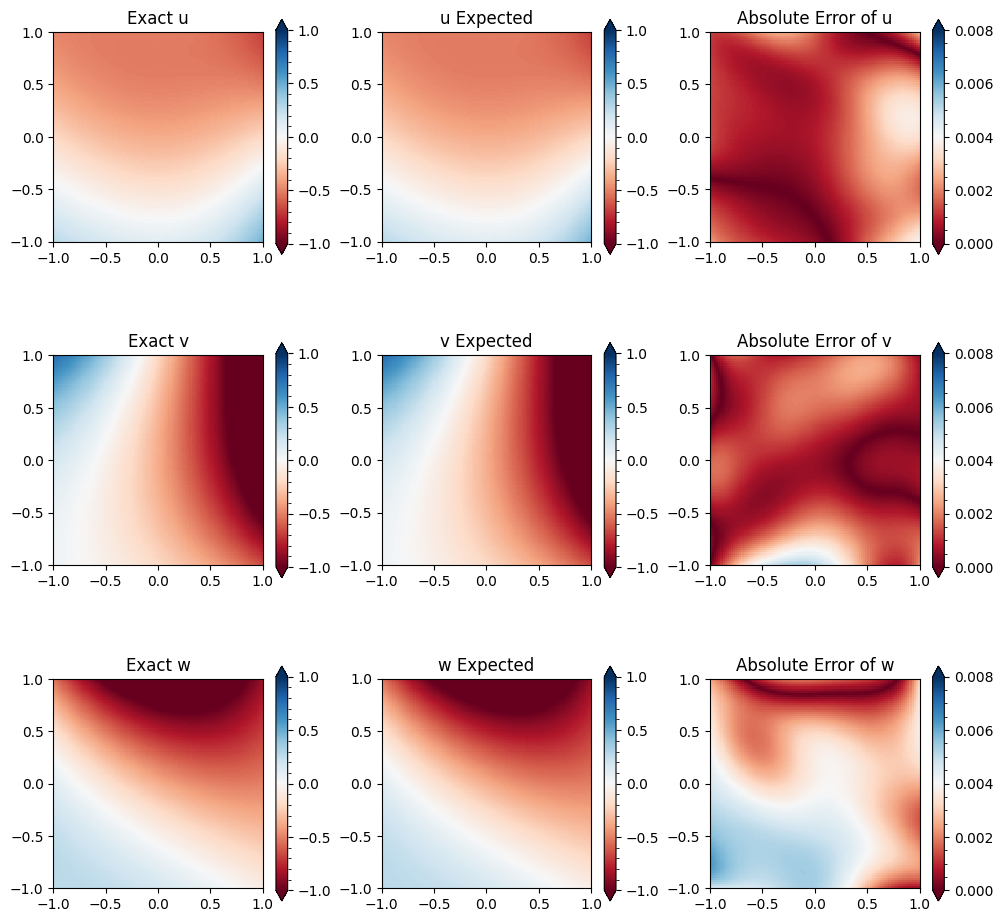

In [3]:
import torch
from torch import nn
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

from Forward_with_Layer_Setting import Net

import os
from datetime import datetime
currentDateTime = datetime.now()
#print("Date of Today : ", currentDateTime.month, " /", currentDateTime.day, "\nHour : ", currentDateTime.hour) 

#Date of Today
ctime = f"{currentDateTime.month}_{currentDateTime.day}_{currentDateTime.hour}h"


###########################################

z_plotted = 0
time_plotted = 1

###########################################

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net() #.to(device)

net.load_state_dict(torch.load("ES_min_mse_IC_lr0.001_t1_2_4_4h.pt")) #, map_location=torch.device('cpu')
'''
Iteration: 30000 	Total Loss: tensor(44.9805)
u relative L2 errors:  0.737307608127594 	v relative L2 errors:  0.6754018068313599 	w relative L2 errors:  0.5902339816093445 	P relative L2 errors:  0.3781571686267853 
IC Loss:  0.005475511774420738 	Dirichlet Bdry Loss:  0.12612561881542206 	Neumann Bdry Loss:  0.04276594892144203 	NS PDE Loss:  27.543834686279297 
e_VP1 Loss:  8.95076847076416 		e_VP2 Loss:  9.267243385314941 		e_VP3 Loss:  9.18327808380127 		e_VP4 Loss:  0.1425447165966034
'''
#Graph at various time slices

spatial_discretization = 100

#Define numpy arrays for inputs
x1 = np.linspace(net.x_l,net.x_u,spatial_discretization).reshape(spatial_discretization)
x2 = np.linspace(net.y_l,net.y_u,spatial_discretization).reshape(spatial_discretization)
x1x2 = np.array(np.meshgrid(x1, x2)).reshape(2,spatial_discretization**2)

x3 = z_plotted*np.ones((spatial_discretization**2,1))
t = time_plotted*np.ones((spatial_discretization**2,1))

x1_input = x1x2[0].reshape(spatial_discretization**2, 1)
x2_input = x1x2[1].reshape(spatial_discretization**2, 1)

x1x2 = [x1_input, x2_input]

#convert to pytorch tensors
pt_x1 = Variable(torch.from_numpy(x1_input).float(), requires_grad=True) #.to(device)
pt_x2 = Variable(torch.from_numpy(x2_input).float(), requires_grad=True) #.to(device)
pt_x3 = Variable(torch.from_numpy(x3).float(), requires_grad=True) #.to(device)

pt_t = Variable(torch.from_numpy(t).float(), requires_grad=True) #.to(device)

#get network outputs
u_pred, v_pred, w_pred, _ = net(pt_x1, pt_x2, pt_x3, pt_t)
u_pred, v_pred, w_pred = u_pred.data.cpu().numpy(), v_pred.data.cpu().numpy(), w_pred.data.cpu().numpy()


#get actual initial condition
u_exact = net.u_eq(pt_x1, pt_x2, pt_x3, pt_t)
v_exact = net.v_eq(pt_x1, pt_x2, pt_x3, pt_t)
w_exact = net.w_eq(pt_x1, pt_x2, pt_x3, pt_t)
#P_exact = net.P_eq(pt_x1, pt_x2, pt_x3, pt_t)

#Convert back to numpy
u, v, w = u_exact.data.cpu().numpy(), v_exact.data.cpu().numpy(), w_exact.data.cpu().numpy()

u_ab_err  = ((((u_pred - u)**2)**.5))
v_ab_err  = ((((v_pred - v)**2)**.5))
w_ab_err  = ((((w_pred - w)**2)**.5))

#u_rel_L2_err = ((((u_pred - u)**2/u**2)**.5))
#v_rel_L2_err = ((((v_pred - v)**2/v**2)**.5))
#w_rel_L2_err = ((((w_pred - w)**2/w**2)**.5))


X, Y = np.meshgrid(x1, x2)



fig, axs = plt.subplots(3,3, figsize=(10,5) )
#fig.suptitle(f'Time = {time_plotted}')
fig.tight_layout()
axs[0,0].set_title('Exact u')
axs[1,0].set_title('Exact v')
axs[2,0].set_title('Exact w')
axs[0,1].set_title('u Expected')
axs[1,1].set_title('v Expected')
axs[2,1].set_title('w Expected')
axs[0,2].set_title('Absolute Error of u')
axs[1,2].set_title('Absolute Error of v')
axs[2,2].set_title('Absolute Error of w')
#axs[2].pcolor(X, Y, error.reshape(X.shape))

## Graph1 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,0].imshow(u.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph2 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,0].imshow(v.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,0].invert_yaxis(), extend='both')
cbar.minorticks_on()



## Graph3 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,0].imshow(w.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,1].imshow(u_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,1].imshow(v_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,1].imshow(w_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,2].imshow(u_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.008,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,2].imshow(v_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.008,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,2].imshow(w_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.008,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,2].invert_yaxis(), extend='both')
cbar.minorticks_on()




#axs[2].legend()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

fig.savefig(f"fig with update_{ctime}.png")

#Printing on Wide Screen                    
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

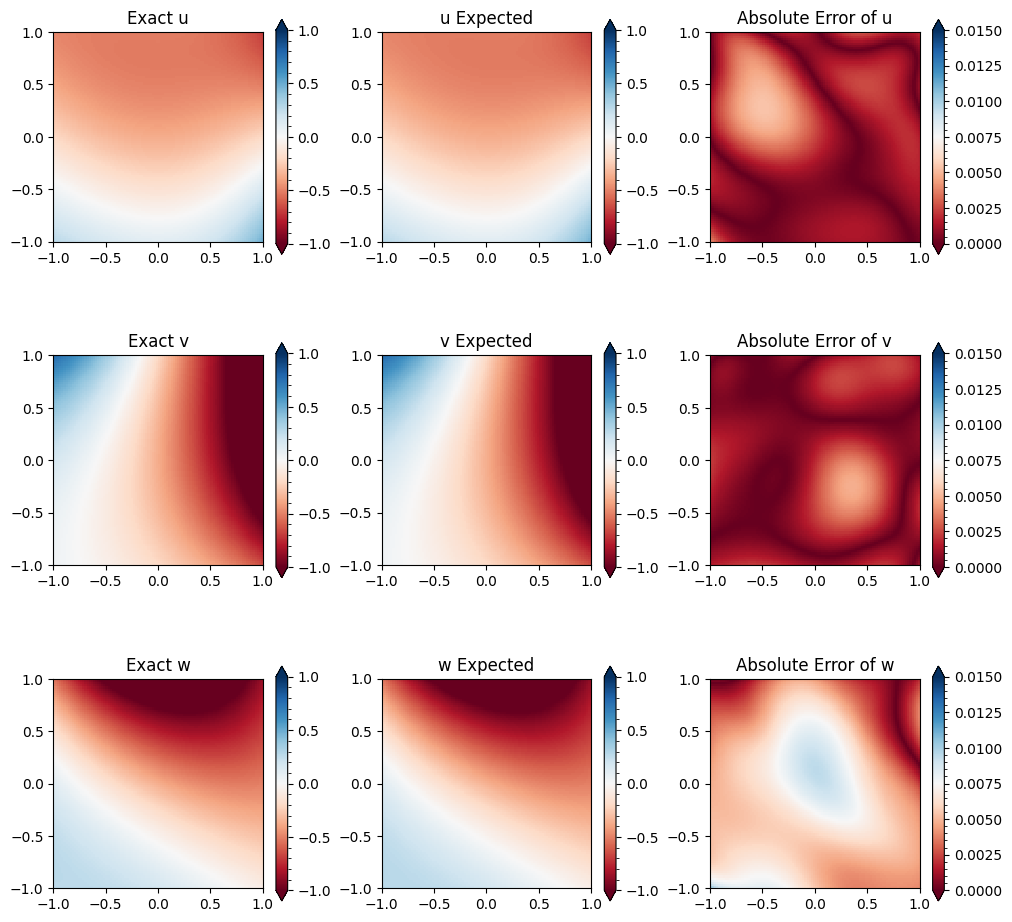

In [14]:
import torch
from torch import nn
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

from Forward_with_Layer_Setting import Net
import os
from datetime import datetime
currentDateTime = datetime.now()
#print("Date of Today : ", currentDateTime.month, " /", currentDateTime.day, "\nHour : ", currentDateTime.hour) 

#Date of Today
ctime = f"{currentDateTime.month}_{currentDateTime.day}_{currentDateTime.hour}h"


###########################################

z_plotted = 0
time_plotted = 1

###########################################

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net() #.to(device)

net.load_state_dict(torch.load("2_2_17hNNlayers_NSCH_0.pt")) #, map_location=torch.device('cpu')

#Graph at various time slices

spatial_discretization = 100

#Define numpy arrays for inputs
x1 = np.linspace(net.x_l,net.x_u,spatial_discretization).reshape(spatial_discretization)
x2 = np.linspace(net.y_l,net.y_u,spatial_discretization).reshape(spatial_discretization)
x1x2 = np.array(np.meshgrid(x1, x2)).reshape(2,spatial_discretization**2)

x3 = z_plotted*np.ones((spatial_discretization**2,1))
t = time_plotted*np.ones((spatial_discretization**2,1))

x1_input = x1x2[0].reshape(spatial_discretization**2, 1)
x2_input = x1x2[1].reshape(spatial_discretization**2, 1)

x1x2 = [x1_input, x2_input]

#convert to pytorch tensors
pt_x1 = Variable(torch.from_numpy(x1_input).float(), requires_grad=True) #.to(device)
pt_x2 = Variable(torch.from_numpy(x2_input).float(), requires_grad=True) #.to(device)
pt_x3 = Variable(torch.from_numpy(x3).float(), requires_grad=True) #.to(device)

pt_t = Variable(torch.from_numpy(t).float(), requires_grad=True) #.to(device)

#get network outputs
u_pred, v_pred, w_pred, _ = net(pt_x1, pt_x2, pt_x3, pt_t)
u_pred, v_pred, w_pred = u_pred.data.cpu().numpy(), v_pred.data.cpu().numpy(), w_pred.data.cpu().numpy()


#get actual initial condition
u_exact = net.u_eq(pt_x1, pt_x2, pt_x3, pt_t)
v_exact = net.v_eq(pt_x1, pt_x2, pt_x3, pt_t)
w_exact = net.w_eq(pt_x1, pt_x2, pt_x3, pt_t)
#P_exact = net.P_eq(pt_x1, pt_x2, pt_x3, pt_t)

#Convert back to numpy
u, v, w = u_exact.data.cpu().numpy(), v_exact.data.cpu().numpy(), w_exact.data.cpu().numpy()

u_ab_err  = ((((u_pred - u)**2)**.5))
v_ab_err  = ((((v_pred - v)**2)**.5))
w_ab_err  = ((((w_pred - w)**2)**.5))

#u_rel_L2_err = ((((u_pred - u)**2/u**2)**.5))
#v_rel_L2_err = ((((v_pred - v)**2/v**2)**.5))
#w_rel_L2_err = ((((w_pred - w)**2/w**2)**.5))


X, Y = np.meshgrid(x1, x2)



fig, axs = plt.subplots(3,3, figsize=(10,5) )
#fig.suptitle(f'Time = {time_plotted}')
fig.tight_layout()
axs[0,0].set_title('Exact u')
axs[1,0].set_title('Exact v')
axs[2,0].set_title('Exact w')
axs[0,1].set_title('u Expected')
axs[1,1].set_title('v Expected')
axs[2,1].set_title('w Expected')
axs[0,2].set_title('Absolute Error of u')
axs[1,2].set_title('Absolute Error of v')
axs[2,2].set_title('Absolute Error of w')
#axs[2].pcolor(X, Y, error.reshape(X.shape))

## Graph1 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,0].imshow(u.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph2 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,0].imshow(v.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,0].invert_yaxis(), extend='both')
cbar.minorticks_on()



## Graph3 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,0].imshow(w.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,1].imshow(u_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,1].imshow(v_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,1].imshow(w_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,2].imshow(u_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=0.015,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,2].imshow(v_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=0.015,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,2].imshow(w_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=0.015,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,2].invert_yaxis(), extend='both')
cbar.minorticks_on()




#axs[2].legend()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

fig.savefig(f"fig without random pick_{ctime}.png")

#Printing on Wide Screen                    
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

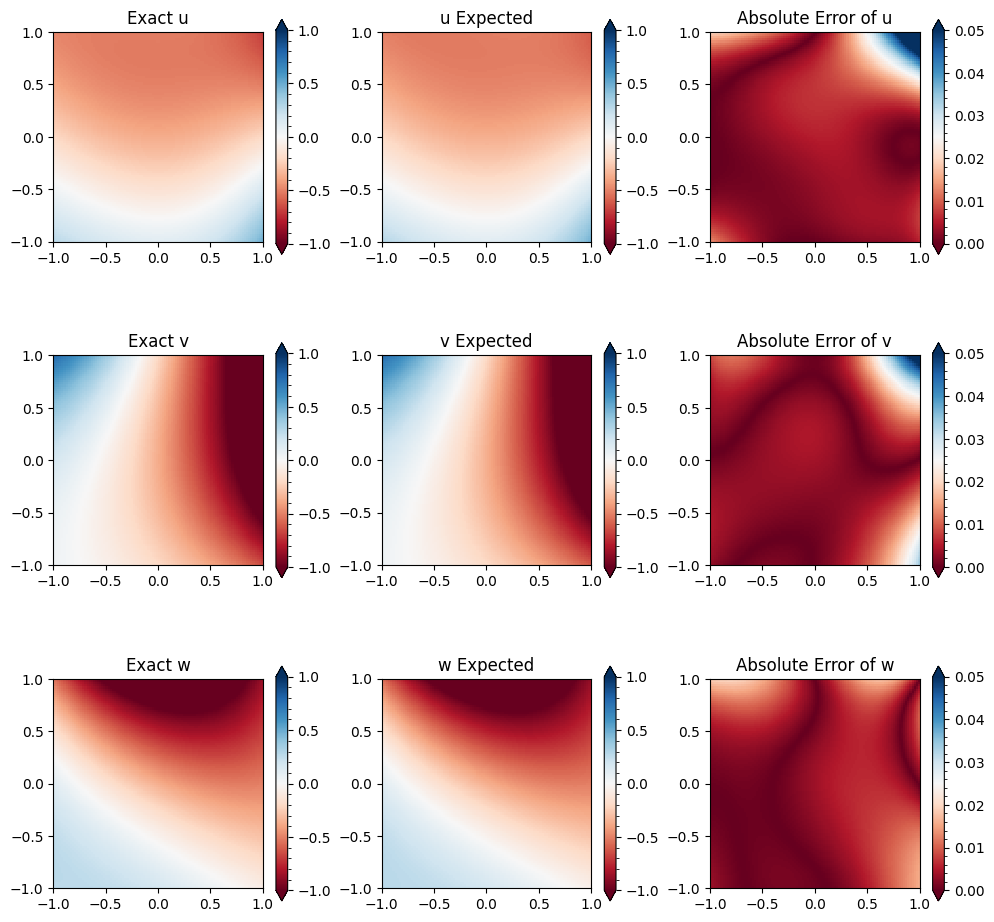

In [12]:
import torch
from torch import nn
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

from Forward_with_Layer_Setting import Net
import os
from datetime import datetime
currentDateTime = datetime.now()
#print("Date of Today : ", currentDateTime.month, " /", currentDateTime.day, "\nHour : ", currentDateTime.hour) 

#Date of Today
ctime = f"{currentDateTime.month}_{currentDateTime.day}_{currentDateTime.hour}h"


###########################################

z_plotted = 0
time_plotted = 1

###########################################

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net() #.to(device)

net.load_state_dict(torch.load("ES_min_loss_lr0.0001_t1_2_2_3h.pt")) #, map_location=torch.device('cpu')
'''
Iteration: 30000 	Total Loss: tensor(44.9805)
u relative L2 errors:  0.737307608127594 	v relative L2 errors:  0.6754018068313599 	w relative L2 errors:  0.5902339816093445 	P relative L2 errors:  0.3781571686267853 
IC Loss:  0.005475511774420738 	Dirichlet Bdry Loss:  0.12612561881542206 	Neumann Bdry Loss:  0.04276594892144203 	NS PDE Loss:  27.543834686279297 
e_VP1 Loss:  8.95076847076416 		e_VP2 Loss:  9.267243385314941 		e_VP3 Loss:  9.18327808380127 		e_VP4 Loss:  0.1425447165966034
'''
#Graph at various time slices

spatial_discretization = 100

#Define numpy arrays for inputs
x1 = np.linspace(net.x_l,net.x_u,spatial_discretization).reshape(spatial_discretization)
x2 = np.linspace(net.y_l,net.y_u,spatial_discretization).reshape(spatial_discretization)
x1x2 = np.array(np.meshgrid(x1, x2)).reshape(2,spatial_discretization**2)

x3 = z_plotted*np.ones((spatial_discretization**2,1))
t = time_plotted*np.ones((spatial_discretization**2,1))

x1_input = x1x2[0].reshape(spatial_discretization**2, 1)
x2_input = x1x2[1].reshape(spatial_discretization**2, 1)

x1x2 = [x1_input, x2_input]

#convert to pytorch tensors
pt_x1 = Variable(torch.from_numpy(x1_input).float(), requires_grad=True) #.to(device)
pt_x2 = Variable(torch.from_numpy(x2_input).float(), requires_grad=True) #.to(device)
pt_x3 = Variable(torch.from_numpy(x3).float(), requires_grad=True) #.to(device)

pt_t = Variable(torch.from_numpy(t).float(), requires_grad=True) #.to(device)

#get network outputs
u_pred, v_pred, w_pred, _ = net(pt_x1, pt_x2, pt_x3, pt_t)
u_pred, v_pred, w_pred = u_pred.data.cpu().numpy(), v_pred.data.cpu().numpy(), w_pred.data.cpu().numpy()


#get actual initial condition
u_exact = net.u_eq(pt_x1, pt_x2, pt_x3, pt_t)
v_exact = net.v_eq(pt_x1, pt_x2, pt_x3, pt_t)
w_exact = net.w_eq(pt_x1, pt_x2, pt_x3, pt_t)
#P_exact = net.P_eq(pt_x1, pt_x2, pt_x3, pt_t)

#Convert back to numpy
u, v, w = u_exact.data.cpu().numpy(), v_exact.data.cpu().numpy(), w_exact.data.cpu().numpy()

u_ab_err  = ((((u_pred - u)**2)**.5))
v_ab_err  = ((((v_pred - v)**2)**.5))
w_ab_err  = ((((w_pred - w)**2)**.5))

#u_rel_L2_err = ((((u_pred - u)**2/u**2)**.5))
#v_rel_L2_err = ((((v_pred - v)**2/v**2)**.5))
#w_rel_L2_err = ((((w_pred - w)**2/w**2)**.5))


X, Y = np.meshgrid(x1, x2)



fig, axs = plt.subplots(3,3, figsize=(10,5) )
#fig.suptitle(f'Time = {time_plotted}')
fig.tight_layout()
axs[0,0].set_title('Exact u')
axs[1,0].set_title('Exact v')
axs[2,0].set_title('Exact w')
axs[0,1].set_title('u Expected')
axs[1,1].set_title('v Expected')
axs[2,1].set_title('w Expected')
axs[0,2].set_title('Absolute Error of u')
axs[1,2].set_title('Absolute Error of v')
axs[2,2].set_title('Absolute Error of w')
#axs[2].pcolor(X, Y, error.reshape(X.shape))

## Graph1 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,0].imshow(u.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph2 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,0].imshow(v.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,0].invert_yaxis(), extend='both')
cbar.minorticks_on()



## Graph3 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,0].imshow(w.reshape(X.shape), cmap='RdBu', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,1].imshow(u_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,1].imshow(v_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,1].imshow(w_pred.reshape(X.shape), cmap='RdBu', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,2].imshow(u_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.05,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,2].imshow(v_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.05,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,2].imshow(w_ab_err.reshape(X.shape), cmap='RdBu', vmin= 0, vmax=.05,
                             interpolation='none', extent = (net.x_l,net.x_u, net.y_u, net.y_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,2].invert_yaxis(), extend='both')
cbar.minorticks_on()




#axs[2].legend()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

fig.savefig(f"fig with grid{ctime}.png")

#Printing on Wide Screen                    
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))